## Importing libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os
import seaborn as sns
#import plotly as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
wine_reviews = pd.read_csv('datasets/winemag-data-130k-v2.csv')
wine_reviews = wine_reviews.drop('Unnamed: 0', axis = 1)
wine_reviews = wine_reviews.drop('region_2', axis = 1)

wine_reviews.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print(f"There are {wine_reviews.isna().any(axis=1).sum()} rows with NA in the dataset; we are going to fill them with MODE of each column since there are a lot of NAs")

There are 77865 rows with NA in the dataset; we are going to fill them with MODE of each column since there are a lot of NAs


In [4]:
for index, item in enumerate(wine_reviews.columns):
    wine_reviews[item].fillna(wine_reviews[item].mode()[0], inplace = True)
    
print(f"Now we have {wine_reviews.isna().any(axis=1).sum()} rows with NA in any column")

Now we have 0 rows with NA in any column


In [5]:
#Let's count duplicates

print(f"There are {wine_reviews.duplicated().sum()} duplicated rows in the dataset - we are going to just get rid of them since it's not too many")

There are 9983 duplicated rows in the dataset - we are going to just get rid of them since it's not too many


In [6]:

wine_reviews = wine_reviews.drop_duplicates()
print(f"There are {wine_reviews.duplicated().sum()} duplicated rows in the dataset now")

There are 0 duplicated rows in the dataset now


## Getting some basic statistics

count    119988.000000
mean         88.442236
std           3.092915
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

Rating skewness is 0.043618366349351935, which means it is skewed a little bit to the right


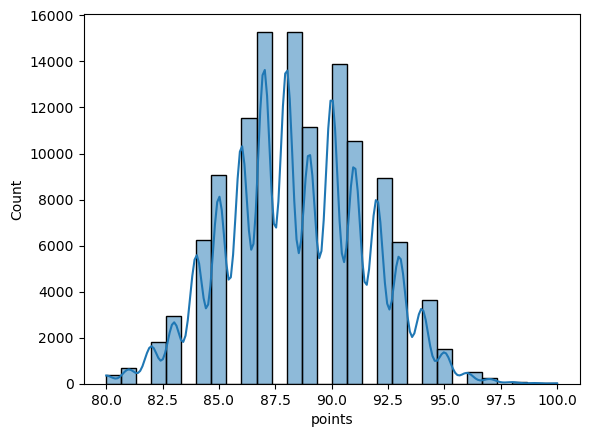

In [7]:
#let's look at wine point/rating distribution
print(wine_reviews.describe()['points'])
print(f"\nRating skewness is {wine_reviews['points'].skew()}, which means it is skewed a little bit to the right")
sns.histplot(wine_reviews['points'], kde=True, bins=30)
plt.show()

We can see that Min value of wine rating is 80 and max is 100. From the histogram above - for further statistical analysis we could make it more nirmal by scaling and transforming rating data.Let's take a look at another numerical value - price

count    119988.000000
mean         34.527836
std          40.799160
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

Price skewness is 18.433883239752436, which means it is skewed highly to the right;we would need to look at log tranformers to make it nicer


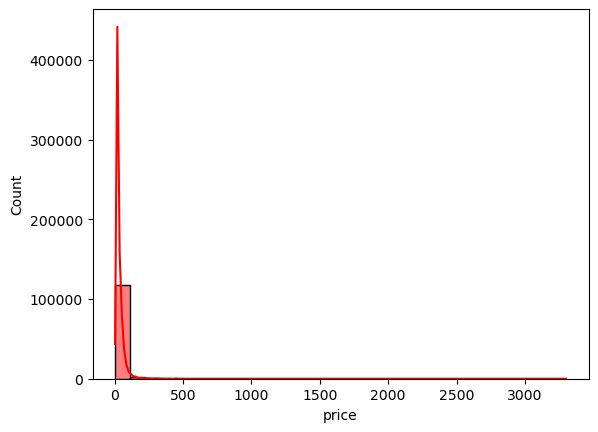

In [8]:
#let's look at wine price distribution
print(wine_reviews.describe()['price'])
print(f"\nPrice skewness is {wine_reviews['price'].skew()}, which means it is skewed highly to the right;we would need to look at log tranformers to make it nicer")
sns.histplot(wine_reviews['price'], kde=True, bins=30, color = 'red')
plt.show()

Let's take a look at different varieties, countries by looking at pie charts of the data

In [9]:
#((wine_reviews['country'].value_counts()/130000)>0.01).keys()[1]

In [10]:
#will get rid of countries that account for <1% of data
countries = pd.Series()

for value, key in enumerate(((wine_reviews['country'].value_counts()/130000)>0.01)):
    if key == True:
        countries = countries.append(pd.Series(((wine_reviews['country'].value_counts()/130000)>0.01).keys()[value]))

C:\Users\Eugene\AppData\Local\Temp\ipykernel_22584\3897282355.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  countries = pd.Series()
C:\Users\Eugene\AppData\Local\Temp\ipykernel_22584\3897282355.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries = countries.append(pd.Series(((wine_reviews['country'].value_counts()/130000)>0.01).keys()[value]))
C:\Users\Eugene\AppData\Local\Temp\ipykernel_22584\3897282355.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries = countries.append(pd.Series(((wine_reviews['country'].value_counts()/130000)>0.01).keys()[value]))
C:\Users\Eugene\AppData\Local\Temp\ipykernel_22584\3897282355.py:6: FutureWarning: The series.append method is deprec

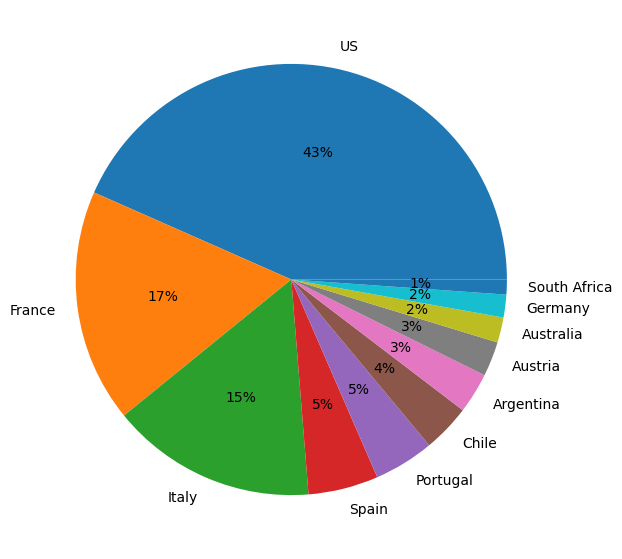

In [11]:
# Creating countries plot
fig, ax = plt.subplots(figsize =(10, 7))
plt.pie(wine_reviews[wine_reviews['country'].isin(countries.values)]['country'].value_counts(), labels = countries.values, autopct='%.0f%%')
plt.show()

As we can see - top 3 countries in our dataset are Italy, France, and US, followed by Spain and Portugal. Let's quicly look at the rating/points distribution.

<AxesSubplot: xlabel='points', ylabel='Density'>

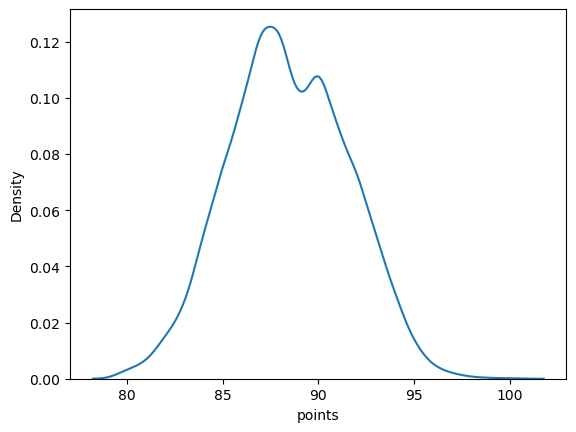

In [29]:
sns.kdeplot(wine_reviews, x = 'points', bw_adjust=2)

We can see that it doesn't follow perfect normal distribution, thus, we could play arounf with transforming it a little as well. 

Now let's take a glance at the most important part of this dataset - reviews. Let's create a word cloud.

In [13]:
text = " ".join(review for review in wine_reviews.loc[:,'description'])

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "aromas", "aroma", "palate", "finish"])

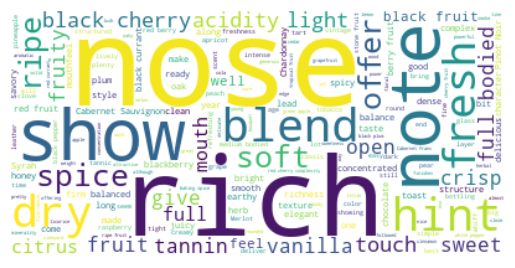

In [18]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()